In [0]:
# 1. Load the cars dataset.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('autos_small.csv')
cars.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [49]:
# 2. Figure out the best strategy to fill missing values

In [50]:
print(cars.isnull().sum() )
cars.dropna(inplace = True)
print(cars.isnull().sum())
cars.shape

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64
price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
model                  0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64


(8010, 11)

In [51]:
# 3. Complete any other preprocessing required.

In [52]:
# Manage categorical variables
data = cars.drop(['name', 'model', 'brand', 'monthOfRegistration'], axis=1)
data = pd.concat([data, pd.get_dummies(data.vehicleType, drop_first=True)], axis = 1)
data = pd.concat([data, pd.get_dummies(data.gearbox, drop_first=True)], axis = 1)
data = pd.concat([data, pd.get_dummies(data.fuelType, drop_first=True)], axis = 1)
data.drop(['vehicleType', 'gearbox', 'fuelType'], axis=1, inplace=True)
data.head()

,price,yearOfRegistration,powerPS,kilometer,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv,manuell,benzin,cng,diesel,elektro,hybrid,lpg
0,400,1992,89,60000,0,0,0,0,1,0,0,1,1,0,0,0,0,0
2,2200,1998,150,150000,0,0,0,0,1,0,0,1,1,0,0,0,0,0
3,4000,2006,0,150000,0,0,0,0,0,1,0,1,0,0,1,0,0,0
4,2600,2002,41,150000,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,2222,2001,143,150000,0,0,0,0,0,1,0,1,1,0,0,0,0,0


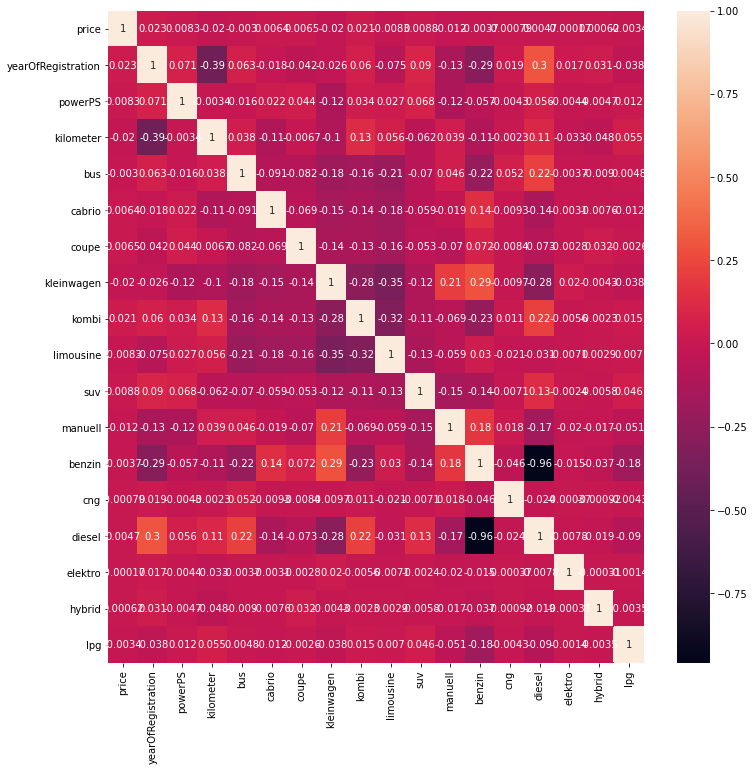

In [19]:
figure, axes = plt.subplots(figsize = (12,12))
axes = sns.heatmap(data.corr(), annot = True)

In [20]:
# 4. Apply various regression models and find out which model is the best for this dataset

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical values
#data[['price', 'powerPS', 'kilometer']] = MinMaxScaler().fit_transform(data[['price', 'powerPS', 'kilometer']])
y = data.pop('price')
X = data

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

print('Building models', end='...')
# Slipt data into train/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Create input data for different models
linear_model = LinearRegression().fit(X_train, y_train)
y_linear = linear_model.predict(X_test)
logistic_model = LogisticRegression().fit(X_train, y_train)
y_logistic = logistic_model.predict(X_test)
tree_model = DecisionTreeClassifier().fit(X_train, y_train)
y_tree = tree_model.predict(X_test)
forest_model = RandomForestClassifier().fit(X_train, y_train)
y_forest = forest_model.predict(X_test)
print('OK')

Building models...

D:\Applications\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OK


In [55]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from math import sqrt, log

print('Linear Regression')
print('RMSE is {:4.4f}'.format(sqrt(mean_squared_error(y_test, y_linear))))
print('R2 is {:4.4f}'.format(r2_score(y_test, y_linear)))
print('Logistic Regression')
print('RMSE is {:4.4f}'.format(sqrt(mean_squared_error(y_test, y_logistic))))
print('R2 is {:4.4f}'.format(r2_score(y_test, y_logistic)))
print('Decision Tree')
print('RMSE is {:4.4f}'.format(sqrt(mean_squared_error(y_test, y_tree))))
print('R2 is {:4.4f}'.format(r2_score(y_test, y_tree)))
print('Random Forest')
print('RMSE is {:4.4f}'.format(sqrt(mean_squared_error(y_test, y_forest))))
print('R2 is {:4.4f}'.format(r2_score(y_test, y_forest)))

Linear Regression
RMSE is 7528.0245
R2 is 0.0533
Logistic Regression
RMSE is 9377.7416
R2 is -0.4691
Decision Tree
RMSE is 4908.7261
R2 is 0.5975
Random Forest
RMSE is 6206.2883
R2 is 0.3566


In [0]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

In [0]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({
    'factor': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    'feature': X.columns
})
print(vif)

         factor             feature
0   2750.597588  yearOfRegistration
1      1.249418             powerPS
2     11.671923           kilometer
3     11.439150                 bus
4      8.771537              cabrio
5      7.417329               coupe
6     26.356716          kleinwagen
7     22.575262               kombi
8     31.809541           limousine
9      5.698122                 suv
10     4.760511             manuell
11  1726.777657              benzin
12     3.993516                 cng
13   877.117772              diesel
14     1.332851             elektro
15     2.992706              hybrid
16    43.679363                 lpg


VIF shows that a lot of our features are redundant, a feature ranking algorithm can be used to identifty the most relevant ones.

#### Model Selection

Models are scored both on their performance on the training dataset and based on the complexity of the model.

In [ ]:
#7 Estimate the maximum likelihood of the model using mean square error

In [71]:
n = cars.shape[0]
ml_linear = n * log(mean_squared_error(y_test, y_linear))
ml_logistic = n * log(mean_squared_error(y_test, y_logistic))

In [72]:
#8. Calculate the value for Akaike Information Criterion (AIC)

In [73]:
k_linear = len(linear_model.coef_) + 1
k_logistic = len(logistic_model.coef_) + 1

print('Linear Regression')
print('AIC is {:4.4f}'.format(ml_linear + 2*k_linear))
print('Logistic Regression')
print('AIC is {:4.4f}'.format(ml_logistic + 2*k_logistic))

Linear Regression
AIC is 143036.7348
Logistic Regression
AIC is 148568.4298


In [74]:
#9. Calculate the value for Bayesian Information Criterion (BIC)

In [75]:
print('Linear Regression')
print('AIC is {:4.4f}'.format(ml_linear + k_linear*log(n)))
print('Logistic Regression')
print('AIC is {:4.4f}'.format(ml_logistic + k_logistic*log(n)))

Linear Regression
AIC is 143162.5269
Logistic Regression
AIC is 155724.5986


In [ ]:
#10. Calculate the Minimum description Length (MDL)

### Miscellaneous

In [ ]:
## Ques 1 
Find the runtime complexity of below python script -

def new_algo(items):
    for item in items:
        print(item)

    for item in items:
        print(item)

new_algo([4, 5, 6, 8])

In [ ]:
O(n)

In [ ]:
## Ques 2

Consider this example of implementing matrix multiplication in Python: 
A = [[1, 2, 3],
    [2, 3, 4]] 
B = [[5, 8],
    [6, 9],
    [7, 10]] 

def matrixmultiply (A, B):
    C = [[0 for row in range(len(A))] 
         for col in range(len(B[0]))] 
    for row_a in range(len(A)):
        for col_b in range(len(B[0])):
            for col_a in range(len(A[0])):
                C[row_a][col_b] += \ A[row_a][col_a] * B[col_a][col_b] 
    return C matrixmultiply(A, B)

Find the runtime complexity of this function.

In [ ]:
O(n^3)

In [ ]:
## Ques 3

Consider an implementation of simple kNN algorithm, where n is the number of training examples and m is 
the number of dimensions in the training set.
(i) Find the runtime complexity of brute-force neighbour search.
(ii) Assume n>>m, will it impact the time complexity of the search. Explain.

In [ ]:
Computing a distance is O(m)
Computing distance between a center and samples is O(nm)
So the total complexity requiring to compute this for k centers is O(knm)


In [ ]:
## Ques 4
Find the Space complexity of below algorithm -- 

def return_squares(n):
    square_list = []
    for num in n:
        square_list.append(num * num)

    return square_list

nums = [2, 4, 6, 8, 10]
print(return_squares(nums))

In [ ]:
O(n)

In [ ]:
## Ques 5
What are the worst case time complexities of searching in binary tree, Binary Search tree and AVL tree respectively?

In [ ]:
O(n) - O(n) - O(height)

In [2]:
## Ques 6
Find the Time complexity of below sorting algorithm - 

def sort1(data):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(data)-1):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                swapped = True
    
if __name__ == '__main__':
    data = [9, 1, 7, 6, 2, 8, 5, 3, 4, 0]
    sort1(data)
    print(data)

In [ ]:
O(n^2)

In [ ]:
##Ques 7 
Find the time complexity of below function --

def eatPies(pies):
    if pies == 0:
        return pies

return eatPies(pies - 1)


In [ ]:
O(n)

In [ ]:
## Ques 8

Calling 'n' the number of training sample, 'p' the number of features, $n_{trees}$ the number of trees (for methods based on various trees). Find the runtime complexity of Decision tree and Random Forest.

### References

1. Linear regression basics -- https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

2. Akaike Information Criteria - https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2

3. Model selection (AIC Vs BIC) -- https://towardsdatascience.com/a-short-introduction-to-model-selection-bb1bb9c73376

4. Time Complexity basics -- https://www.datacamp.com/community/tutorials/analyzing-complexity-code-python

5. Computational complexity of ML algorithms -- https://www.thekerneltrip.com/machine/learning/computational-complexity-learning-algorithms/

6. Algorithm runtime prediction: Methods & evaluation - https://www.sciencedirect.com/science/article/pii/S0004370213001082